# PyTorch Workflow

Durante el segundo modelo se verán algunos de los fundamentos de los modelos más básicos de ML y DL utilizando Pytorch.

Verémos como cargar, limpiar y procesar datos, junto a sus correspondientes algoritmos.

Para empezar utilizaremos mucho de torch nn: https://docs.pytorch.org/docs/stable/nn.html

In [266]:
import torch
from torch import nn # nn contiene todos los bloques de PyTorch para la creación de redes neuronales
import matplotlib.pyplot as plt

torch.__version__

'2.7.1+cpu'

# Datos en general

Los datos pueden venir en diversos formatos (por no decir infinitos), archivos JSON, XML, CSV, Excel, audio, video o todos ellos mezclados. 

Es importarte saber obtener los datos de forma correcta de cada uno de estos para poder de esta manera cargar nuestros modelos correctamente.

Podemos decir que, genericamente, el ML se divide en dos partes:

1. Obtener datos y llevarlos a números.
2. Construir modelos para reconocer patrones en esta.

Para esta primera parte en la que obtenemos y llevamos la data a números debemos tener en cuenta que los datos a su vez deben ser separados en:
- Datos de entrenamiento: 60%-80%
- Datos de validación: 10%-20% 
- Datos de prueba: 10%-20%

<center><img src="img/split_data_train.png" alt="Bootcamp" width="500"></center>

Para realizar esta distinción entre los datos nos valdrémos de funciones de pyTorch, stiklearn y matplotlib para visualizar esta en gráficos.

Matploblib es una libreria muy completa, llena de propiedades y opciones para la construcción de gráficos.

Podríamos decir que es el CSS de los gráficos de python.

Para este primer ejemplo realizaremos una función que grafique una serie de puntos correspondientes a un set de datos totalmente lineal, es un ejemplo introductorio.

In [267]:
# Datos a visualizar

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [268]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [269]:
# Gráficar datos

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:

        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})

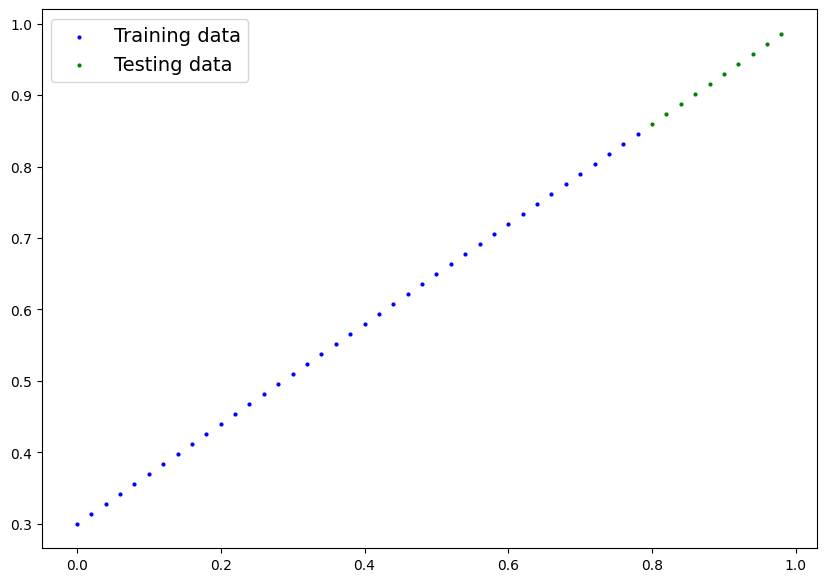

In [270]:
plot_predictions()

# Modelos de ML: Regresión lineal

La regresión lineal es un modelo que busca mediante determinadas cuentas matemáticas buscar la recta lineal que más se acerque a poder predecir determinado valor que represente la salida de un determinado input.

Por ejemplo: los precios de una casa, la altura según el paso del tiempo de una determinada población, el IMC de personas que realizan o no deporte, el riesgo de enfermedades según el peso, entre muchas otras combinaciones que incluso pueden llevarse al plano 3D, obteniendo una recta en R3.

El fundamento matemático no es tema central de este archivo, sin embargo en caso de querer buscar algunos métodos uno de ellos es el método de minimos cuadrados.

Aunque este fundamento matemático no es estrictamente el utilizado por pyTorch, debemos tener en cuenta dos conceptos muy importantes relacionados con análisis matemático:

- Descenso del vector gradiente
- Retropropagación

El bootcamp de momento no va mucho a detalle con esto, ni mucho menos explica el fundamento matemático al nivel que la universidad sí.

Es por esto que de momento solo lo dejaré así, luego le dedicaré un .ipynb o PDF necesario a esto para que quede completamen te claro: no es que cada vez que uno programe tenga que hacer esto manualmente ni mucho menos, pero entender que hay detrás de estos algoritmos nos hará sacar un mayor provecho, sino solo será código y ante un error o imprevisto no sabrémos que hacer.

In [271]:
# Instaciaremos una clase para contener el modelo en cuestión

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    # Ya teniendo creado el constructor con los datos de entrada podrémos crear nuestro modelo
    # Para ver que tan preciso es nuestro modelo de pyTorch vs un modelo creado manualmente crearé uno
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias        
        

# Funciones a tener en cuenta a la hora de realizar modelos

· torch.nn 

· torch.hh.Parameter

· torch.nn.Module

· torch.optim

· def foward()

Toda la documentación asociada esta acá: https://docs.pytorch.org/tutorials/index.html.

Cabe aclarar que todas estás funciones a día de escribir esto (17/07/2025) no fueron explicadas dado que aún no entiendo bien su funcionamiento, sin embargo son utilizadas en las siguientes etapas:


<center><img src="img/funciones_torch.jpg" alt="funciones" width="500"></center>



In [272]:
torch.manual_seed(42)

# Instanciaremos la clase creada previamente en una subclase

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [273]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [274]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [275]:
y_test # Hasta ahora no es eficiente

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

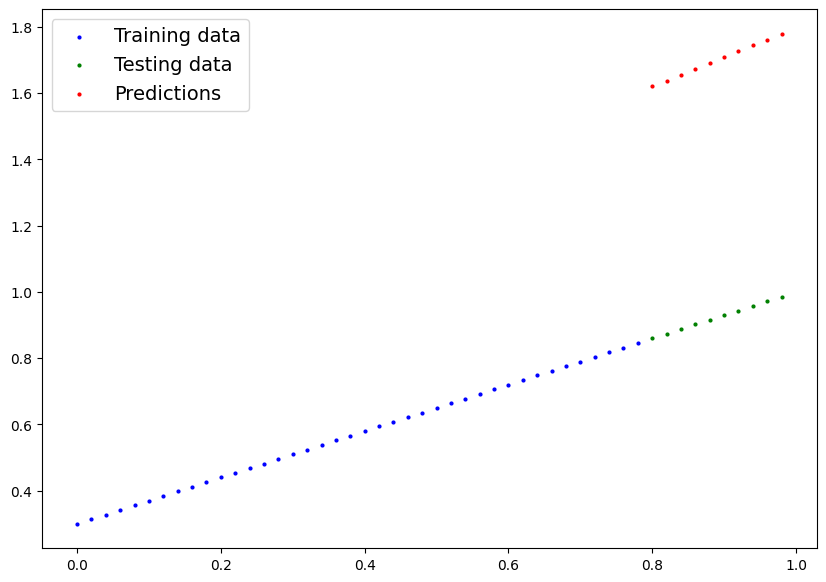

In [276]:
plot_predictions(predictions=y_preds)

# Entrenando nuestros modelos

La idea principal de entrenar un modelo es transformar parametros aleatorios en parametros conocidos, estos ultimos son salidas validas.

En simples palabras es transformar una representación pobre de data en una buena.

Una manera de saber que tan pobre o no es nuestra data es usar las funciones ***loos*** o funciones de perdida, también llamados funciones de costo o criterio.

Entonces para entrenar nuestros modelos necesitamos:

- **Función de perdida:** esta función nos dirá que tan bueno o malo es nuestro modelo.

- **Optimizador:** Ajustará nuestro modelo para mejorar la función de perdida

Para pyTorch esto se realizará mediante:

- Un loop de entrenamiento

- Un loop de prueba

La documentación asociada a las funciones de perdida es la siguiente: https://docs.pytorch.org/docs/stable/nn.html#loss-functions

Entonces, a continuación realizaremos lo siguiente:

<center><img src="img/blucle_optimizador_y_entrenador.png" width="500"></center>

Comenzaremos instanciando la función de perdida y optimización.

In [277]:
loss_fn = nn.L1Loss() # Instanciamos la función de perdida.

optimizer = torch.optim.SGD(params= # Instanciamos el optimizador, en este caso el del gradiente.
                            model_0.parameters(), 
                            lr=0.01) # lr: learning rate

### Ciclo de entrenamiento

Para realizar este *ciclo de entrenamiento* también  llamado *train loop* debemos:

1. Iterar através de los datos
2. Usarla en nuestro modelo
3. Calcular la función de perdida
4. Optimizar mediante el gradiente
5. Reducir la perdida con retroprogragación
6. Optimizar pasos *(?)*

<center><img src="img/train_loop.png" witdh="500"></center>

In [278]:
epocas = 1 # Una epoca es una iteración de cada ciclo de entrenamiento

for epoca in range(epocas):
    # Instaciamos el modelo de entrenamiento 
    model_0.train()
    y_pred = model_0(X_train)
    # Calculamos la perdida
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()

model_0.state_dict()

OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])

In [279]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

(tensor([[1.6077],
         [1.6253],
         [1.6428],
         [1.6604],
         [1.6780],
         [1.6955],
         [1.7131],
         [1.7307],
         [1.7482],
         [1.7658]]),
 tensor([[1.6208],
         [1.6385],
         [1.6561],
         [1.6738],
         [1.6914],
         [1.7090],
         [1.7267],
         [1.7443],
         [1.7620],
         [1.7796]]))

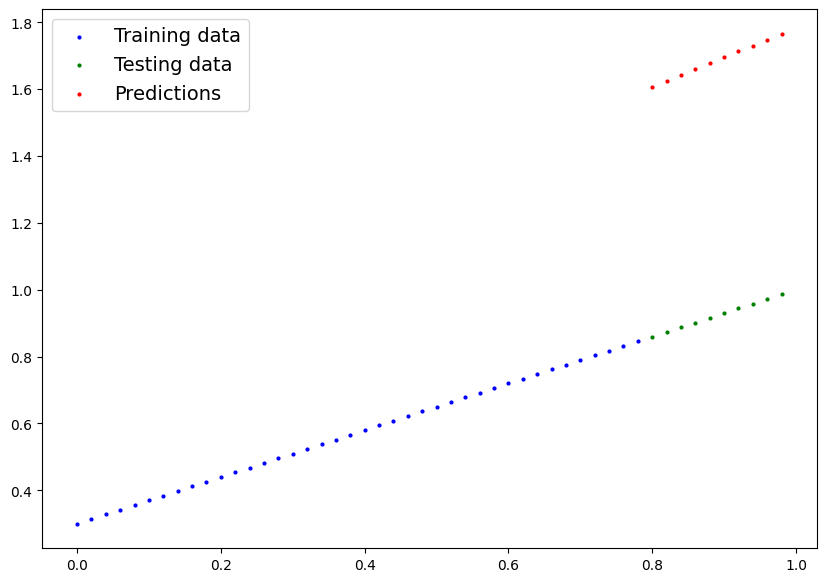

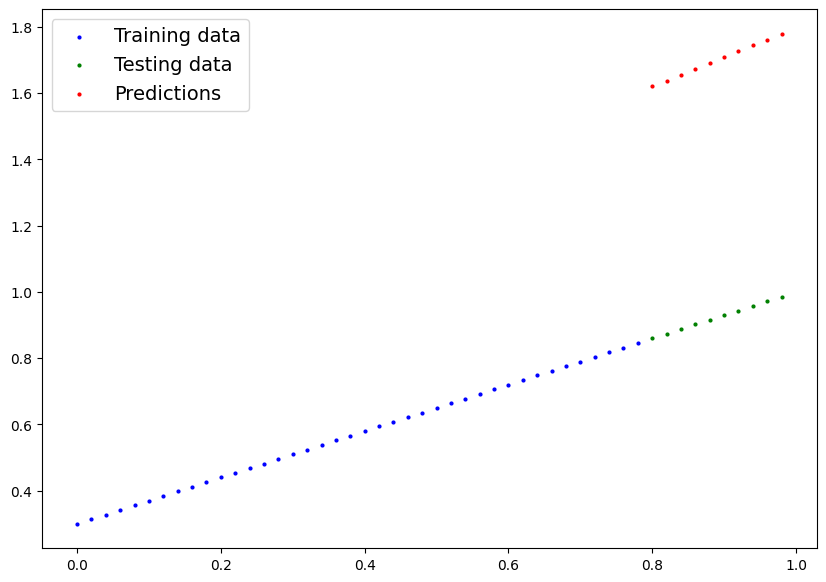

In [280]:
plot_predictions(predictions=y_preds_new)
plot_predictions(predictions=y_preds)

y_preds_new, y_preds # De momento no mejoró casi nada

# Ciclo de prueba

Para saber si nuestro modelo esta funcionando como es de esperar podrémos valernos de datos y gráficos realizados con matplotlib que nos permitirán visualizar los datos, llamarémos a esto *ciclo de prueba*, en donde iteraremos a través de las epocas y, si nuestro modelo funciona como es de esperar, la función de perdida o loss deberá bajar.

Para esto inicialmente llenaremos listas de datos correspondientes a la función de perdida de los datos de entrenamiento y prueba, junto a otra que en el mismo índice tenga la epoca en cuestión. Por lo que nuestras listas deberán ser del mismo tamaño.

<center><img src="img/test_loop.png"></center>

In [281]:
torch.manual_seed(42)

epocas = 200

train_loss_values = []
test_loss_values = []
contador_epocas = []

for epoca in range(epocas):

    model_0.train()
    
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        
        if epoca % 10 == 0: # Cada 10 epocas o iteraciones...
            contador_epocas.append(epoca)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoca: {epoca} | Perdida en entrenamiento: {loss} | Perdida en prueba: {test_loss} ")


Epoca: 0 | Perdida en entrenamiento: 0.6745679974555969 | Perdida en prueba: 0.7502816915512085 
Epoca: 10 | Perdida en entrenamiento: 0.5593580603599548 | Perdida en prueba: 0.6155718564987183 
Epoca: 20 | Perdida en entrenamiento: 0.4441482126712799 | Perdida en prueba: 0.48086196184158325 
Epoca: 30 | Perdida en entrenamiento: 0.328938364982605 | Perdida en prueba: 0.346152126789093 
Epoca: 40 | Perdida en entrenamiento: 0.21372847259044647 | Perdida en prueba: 0.21144230663776398 
Epoca: 50 | Perdida en entrenamiento: 0.09851861745119095 | Perdida en prueba: 0.07673247158527374 
Epoca: 60 | Perdida en entrenamiento: 0.009325616993010044 | Perdida en prueba: 0.0205828957259655 
Epoca: 70 | Perdida en entrenamiento: 0.005879654549062252 | Perdida en prueba: 0.012997227720916271 
Epoca: 80 | Perdida en entrenamiento: 0.0024408488534390926 | Perdida en prueba: 0.004724687431007624 
Epoca: 90 | Perdida en entrenamiento: 0.004425036255270243 | Perdida en prueba: 0.005930870771408081 
Epo

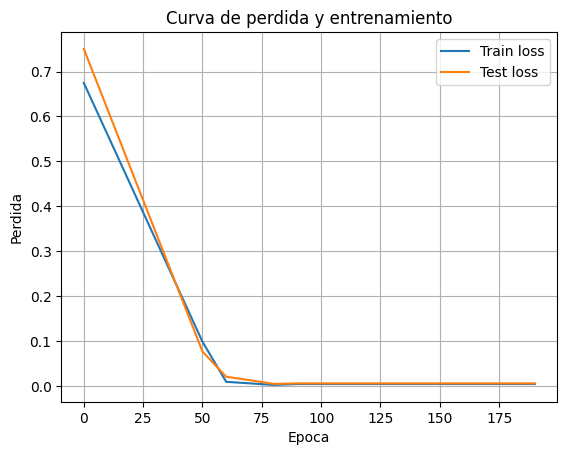

In [282]:
# A simple vista parece mejorar, pero ante la esperada inexperiencia de quienes realizan el curso y la gran cantidad de dantos que suelen manejarse lo mejor es valernos de un gráfico:

plt.plot(contador_epocas, train_loss_values, label="Train loss")
plt.plot(contador_epocas, test_loss_values, label="Test loss")
plt.title("Curva de perdida y entrenamiento")
plt.ylabel("Perdida")
plt.xlabel("Epoca")
plt.grid(zorder=0)
plt.legend()

# Guardando nuestro modelo

Podrémos guardar nuestros modelos con una determinada extensión en caso de quererlo, sin la necesidad de enviar un .ipynb comlpleto y cambiar la ruta de nuestros datos.
Para esto debemos valernos de las siguientes funciones:

1. torch.save
2. torch.load
3. torch.nn.Module.load_state_dict()

La documentación asociada se encuentra en el siguiente sitio: https://docs.pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html

In [283]:
from pathlib import Path # Importamos la libreria

# Instanciamos la ruta del directorio

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Creamos el nombre del directorio
MODEL_NAME = "pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Guardamos el modelo
print(f"Guardamos el modelo en: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH) 

Guardamos el modelo en: models\pytorch_workflow.pth


In [284]:
# Ahora bien, podrémos cargar también dicho modelo y utilizarlo

model_0_cargado = LinearRegressionModel()

model_0_cargado.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [285]:
model_0_cargado.eval()

with torch.inference_mode():
    model_0_cargado = model_0_cargado(X_test)

model_0_cargado

tensor([[0.8530],
        [0.8669],
        [0.8808],
        [0.8946],
        [0.9085],
        [0.9224],
        [0.9363],
        [0.9501],
        [0.9640],
        [0.9779]])

In [286]:
# Cargamos el modelo previo

model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8530],
        [0.8669],
        [0.8808],
        [0.8946],
        [0.9085],
        [0.9224],
        [0.9363],
        [0.9501],
        [0.9640],
        [0.9779]])

In [287]:
y_preds == model_0_cargado

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [288]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


# Regresión lineal con funciones propias de pyTorch

Anteriormente creamos un modelo de regresión líneal manualmente, o casi (se puede bajar más a detalle incluso).

Si bien esto no esta mal, lo cierto es que pyTorch nos proporciona un su modelo nn un (mal llamado) objeto *nn.Linear()*.

Una vez tengamos este podrémos instanciar la función de perdida y optimización y crear el ciclo de entrenamiento y prueba.

In [289]:
class LinearRegressionModelV2(nn.Module): # Si las celdas se ejecutan en orden y esta tiene el mismo nombre que la clase anterior esta sobreescribirá la de arriba
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

In [290]:
next(model_1.parameters()).device

device(type='cpu')

In [291]:
# Función de perdida y optimizador

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [292]:
# Ciclo de entrenamiento y prueba

torch.manual_seed(42)

epocas = 200

for epoca in range(epocas):
    model_1.train()

    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        text_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoca % 10 == 0:
        print(f"Epoca: {epoca} Perdida: {loss} Prueba de perdida: {test_loss}")

Epoca: 0 Perdida: 0.5551779866218567 Prueba de perdida: 0.00754010071977973
Epoca: 10 Perdida: 0.4399680495262146 Prueba de perdida: 0.00754010071977973
Epoca: 20 Perdida: 0.3247582018375397 Prueba de perdida: 0.00754010071977973
Epoca: 30 Perdida: 0.20954827964305878 Prueba de perdida: 0.00754010071977973
Epoca: 40 Perdida: 0.09433844685554504 Prueba de perdida: 0.00754010071977973
Epoca: 50 Perdida: 0.023886386305093765 Prueba de perdida: 0.00754010071977973
Epoca: 60 Perdida: 0.0199567973613739 Prueba de perdida: 0.00754010071977973
Epoca: 70 Perdida: 0.016517987474799156 Prueba de perdida: 0.00754010071977973
Epoca: 80 Perdida: 0.013089170679450035 Prueba de perdida: 0.00754010071977973
Epoca: 90 Perdida: 0.009653178043663502 Prueba de perdida: 0.00754010071977973
Epoca: 100 Perdida: 0.006215679459273815 Prueba de perdida: 0.00754010071977973
Epoca: 110 Perdida: 0.002787243574857712 Prueba de perdida: 0.00754010071977973
Epoca: 120 Perdida: 0.0012645035749301314 Prueba de perdida: 

In [293]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

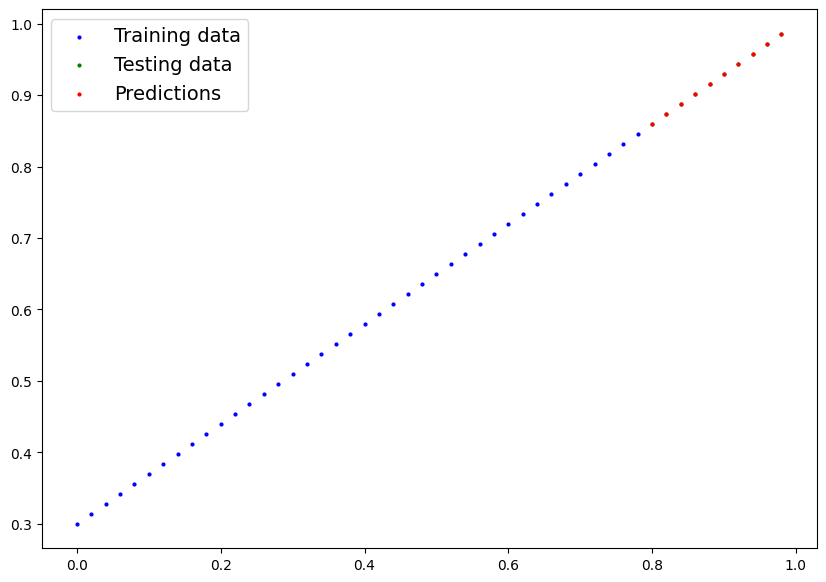

In [294]:
plot_predictions(predictions=y_preds) # Este modelo fue infinitamente superior al realizado manualmente, así el que usamos manualmente quizas no sea el mejor o el más desarrollado

In [ ]:
# Dado que el modelo sirve, guardemoslo...

# Creamos el directorio del modelo
MODE_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Instanciamos la ruta
MODEL_NAME = "pytorch_workflow_improved_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Guardado en: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


Guardado en: models\pytorch_workflow_improved_model.pth


TypeError: save() missing 1 required positional argument: 'f'